
## data_month3
#### WATCHING_MEACHINE | ??? |                                          


In [2]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random


d =31
time_a = pd.date_range('2016-12-01 00:00:00', periods=5760*(d+1), freq='15S')
# print time_a
time_b = pd.date_range('2016-12-01 00:00:14', periods=5760*(d+1), freq='15S')
# print time_b

clock1 = time_b.strftime("%H:%M:%S")

conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

conn1= MySQLdb.connect("localhost","conn","hems")
c1 = conn1.cursor()

####### set databases to empty #########
query_empty = """truncate table data_month3.washing_machine """ 
c1.execute(query_empty)
print "data_month3.washing_machine  are Empty!!! \n"

query = "SELECT watt FROM collected_info.7_watching_meachine WHERE no >= '%s'   AND no <= '%s'; "% (0,293)
df = pd.read_sql(query, conn)
# print df.watt[5]


#### Random the turning-on time appliances
def rand_turnon():
    duration_sec =  random.randint(0, 59)
    duration_min =  random.randint(0, 59)
    duration_hour1 =   ['10'] * 2 +  ['11'] * 3 + ['12'] * 5 + ['13'] * 50 + ['14'] * 20 + ['15'] * 10 +['16'] * 5 +['17'] * 5
    duration_hour = random.choice(duration_hour1)     
    if 0 < duration_sec <= 15:
        k = 0
    elif 15 < duration_sec <= 30:
        k = 1
    elif 30 < duration_sec <= 45:
        k = 2
    else:
        k = 3
    off_item = (int(duration_hour)*240) + (int(duration_min)*4)+ k 
    print "time to turn-on appliacne on",duration_hour,":",duration_min,":",duration_sec,"equal to",off_item,"items"
    return off_item

 
#### Random the off-duration appliances 
def rand_duration():
    duration_sec =  random.randint(0, 59)
    duration_min =  random.randint(0, 59)
    duration_hour1 = ['1'] * 15 + ['2'] * 70 + ['2'] * 15 
    duration_hour = random.choice(duration_hour1)       
    seconds = (int(duration_hour)*3600)+(duration_min*60)+duration_sec
    no_item = seconds/15
    print "consuming the appliance", duration_hour,"hours",duration_min,"minutes",duration_sec,"seconds that equal to",seconds,"seconds or",no_item,"items"
    return no_item


a = 0
days = 0
j = 0
i = 0
do_days1 = ['5'] * 10 + ['6'] * 50 + ['0'] * 40
do_days = random.choice(do_days1)
dict = {'5': 'Friday', '6': 'Saturday', '0': 'Sunday'}
print "| use watching_meachine in next week on | ... ",dict[do_days]
off_item = rand_turnon()  
no_item = rand_duration()


while (j <= (5760*d)-1):
    no_days = int(time_b[j].strftime('%w'))  # find 0-6 of no_days

    
    if (no_days == 0 and clock1[j] == u'23:59:59'):    #if no_day is SUNDAY at 23:59:59 check d0_days in week 
        do_days1 = ['5'] * 10 + ['6'] * 50 + ['0'] * 40   #fri-sat-sun
        do_days = random.choice(do_days1) 
        dict = {'5': 'Friday', '6': 'Saturday', '0': 'Sunday'}
        print "\n| use watching_meachine in next week on | ... ",dict[do_days]
        off_item = rand_turnon()  
        no_item = rand_duration()


    if (int(do_days) == no_days):
        i= 0  
        c1.execute("INSERT INTO data_month3.washing_machine (Timestamp, watt) VALUES (%s, %s)",(time_b[j],0))
        while (off_item+(5760*(days-1))<= j <= (no_item+off_item)+(5760*(days-1))):
            
            if (i >= len(df)):
                i = 30    
                
            c1.execute("INSERT INTO data_month3.washing_machine (Timestamp, watt) VALUES (%s, %s)",(time_b[j],df.watt[i]))
            conn1.commit()
            i += 1 
            j += 1     
            print "|",j,
            

    else : 
        c1.execute("INSERT INTO data_month3.washing_machine (Timestamp, watt) VALUES (%s, %s)",(time_b[j],0))
        
    if (j%5760 == 0):
        print "\nDays :",days ,":",time_b[j].strftime('%a')
        days +=1        
    j += 1
    conn1.commit()
print "DONE!"

 


data_month3.washing_machine  are Empty!!! 

| use watching_meachine in next week on | ...  Saturday
time to turn-on appliacne on 14 : 56 : 6 equal to 3584 items
consuming the appliance 2 hours 16 minutes 33 seconds that equal to 8193 seconds or 546 items

Days : 0 : Thu

Days : 1 : Fri

Days : 2 : Sat
| 15105 | 15106 | 15107 | 15108 | 15109 | 15110 | 15111 | 15112 | 15113 | 15114 | 15115 | 15116 | 15117 | 15118 | 15119 | 15120 | 15121 | 15122 | 15123 | 15124 | 15125 | 15126 | 15127 | 15128 | 15129 | 15130 | 15131 | 15132 | 15133 | 15134 | 15135 | 15136 | 15137 | 15138 | 15139 | 15140 | 15141 | 15142 | 15143 | 15144 | 15145 | 15146 | 15147 | 15148 | 15149 | 15150 | 15151 | 15152 | 15153 | 15154 | 15155 | 15156 | 15157 | 15158 | 15159 | 15160 | 15161 | 15162 | 15163 | 15164 | 15165 | 15166 | 15167 | 15168 | 15169 | 15170 | 15171 | 15172 | 15173 | 15174 | 15175 | 15176 | 15177 | 15178 | 15179 | 15180 | 15181 | 15182 | 15183 | 15184 | 15185 | 15186 | 15187 | 15188 | 15189 | 15190 | 15191 |

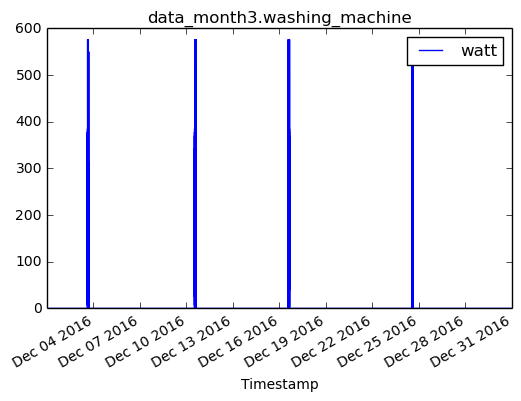

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random
%matplotlib inline  
conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

conn1= MySQLdb.connect("localhost","conn","hems")
c1 = conn1.cursor()
d =31
time_a = pd.date_range('2016-12-01 00:00:00', periods=5760*(d+1), freq='15S')
# print time_a
time_b = pd.date_range('2016-12-01 00:00:14', periods=5760*(d+1), freq='15S')
query = "SELECT Timestamp,watt FROM data_month3.washing_machine WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[5760*30])
df = pd.read_sql(query, conn1, index_col=['Timestamp'])
fig, ax = plt.subplots()
ax.set_title('data_month3.washing_machine')
df.plot(ax=ax )
plt.show()
# df.to_csv('file.csv')
# print len(df)
